In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [25]:
proj = '/Users/ericabusch/Dropbox/Projects/DBS_roskies/'
control = pd.read_csv(proj+'Responses_control_reordered_May27.csv')
anxiety = pd.read_csv(proj+'Responses_anxiety_reordered_May27.csv')
cluster_key = pd.read_csv(proj+'clusters_forcontrol_20_reordered.csv')
questions = control.columns

# Control

## correlation matrix of control responses to questions; turned off the dendrogram lines.

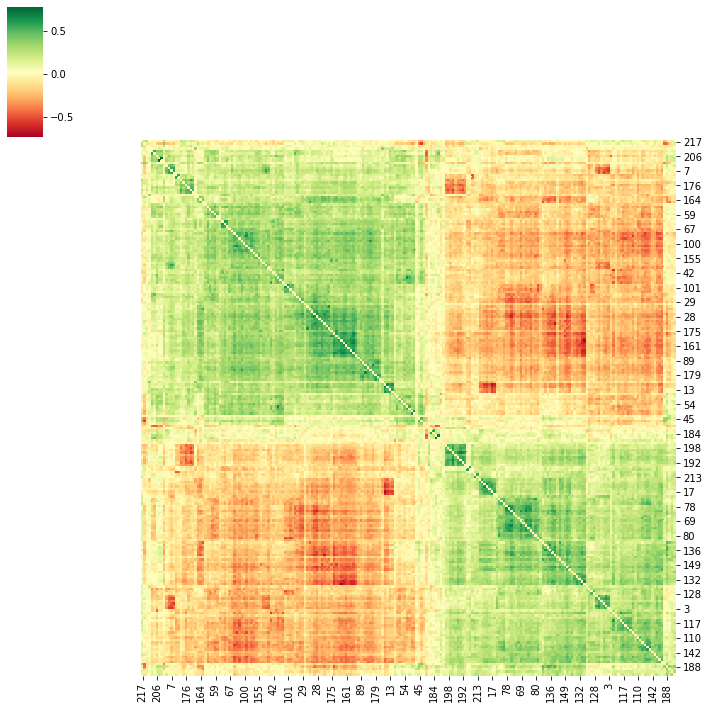

In [48]:
# this is a correlation matrix of all of your questions & control responses
b = squareform(1-pdist(control.T,'correlation'))
cg = sns.clustermap(b,cmap='RdYlGn',metric='correlation')
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

## RDM of control responses to each cluster of questions

In [51]:
rdm_results = []
labels = zip(np.squeeze(cluster_key),questions)
control_df = control.T.set_index(labels)

In [58]:
across_question_correlations = squareform(pdist(control_df,'correlation'))
step2_RDMs = []
for c in pd.unique(cluster_key['clusters']):
    indices = (cluster_key['clusters'] == c) # just figure out where in the raw responses that question is
    # this gives us how correlated those questions are with all the questions in the survey
    cluster_correlations = across_question_correlations[indices]
    # transposing so that the questions are features and the correlation values are samples 
    step2_RDMs.append(pdist(cluster_correlations.T, 'correlation')) # correlation distance

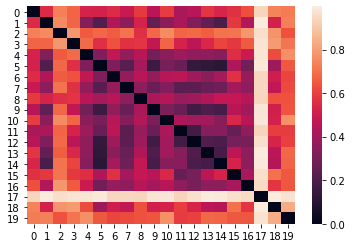

In [69]:
cluster_by_cluster_RDM = squareform(pdist(np.array(step2_RDMs),'correlation'))
sns.heatmap(cluster_by_cluster_RDM)

Text(0.5, 1, 'Dissimilarity (1-r) of control responses to each cluster of questions')

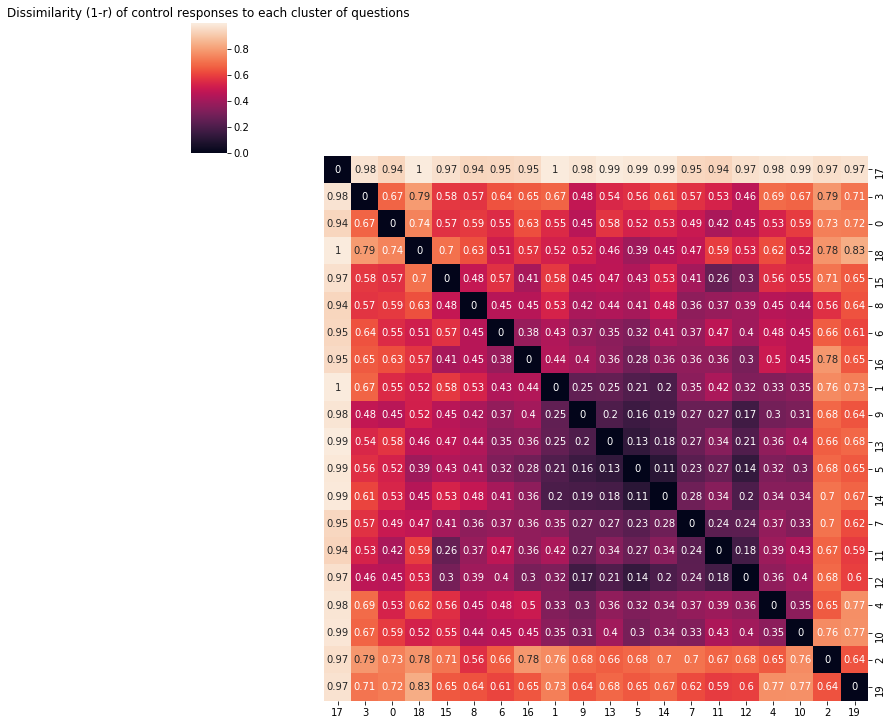

In [76]:
control_cluster_RDM = sns.clustermap(cluster_by_cluster_RDM,metric='correlation', annot=True)
control_cluster_RDM.ax_row_dendrogram.set_visible(False)
control_cluster_RDM.ax_col_dendrogram.set_visible(False)
ctrl_cluster_ind=control_cluster_RDM.dendrogram_row.reordered_ind
plt.title('Dissimilarity (1-r) of control responses to each cluster of questions')

## do the same thing for anxiety data

/Users/ericabusch/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


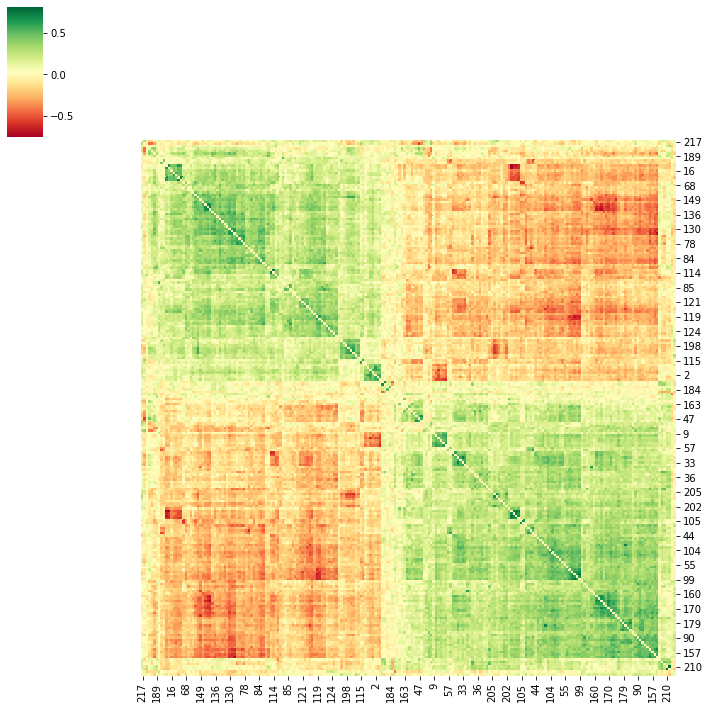

In [77]:
# this is a correlation matrix of all of your questions & anxiety responses
b = squareform(1-pdist(anxiety.T,'correlation'))
cg = sns.clustermap(b,cmap='RdYlGn',metric='correlation')
cg.ax_row_dendrogram.set_visible(False)
cg.ax_col_dendrogram.set_visible(False)

In [86]:
rdm_results = []
labels = zip(np.squeeze(cluster_key),questions)
anxiety_df = anxiety.set_index(labels)

In [87]:
anxiety_across_question_correlations = squareform(pdist(anxiety_df,'correlation'))
step2_RDMs = []
for c in pd.unique(cluster_key['clusters']):
    indices = (cluster_key['clusters'] == c) # just figure out where in the raw responses that question is
    # this gives us how correlated those questions are with all the questions in the survey
    anxiety_cluster_correlations = anxiety_across_question_correlations[indices]
    # transposing so that the questions are features and the correlation values are samples 
    step2_RDMs.append(pdist(anxiety_cluster_correlations.T, 'correlation')) # correlation distance

Text(0.5, 1, 'Anxiety cluster dissimilarity')

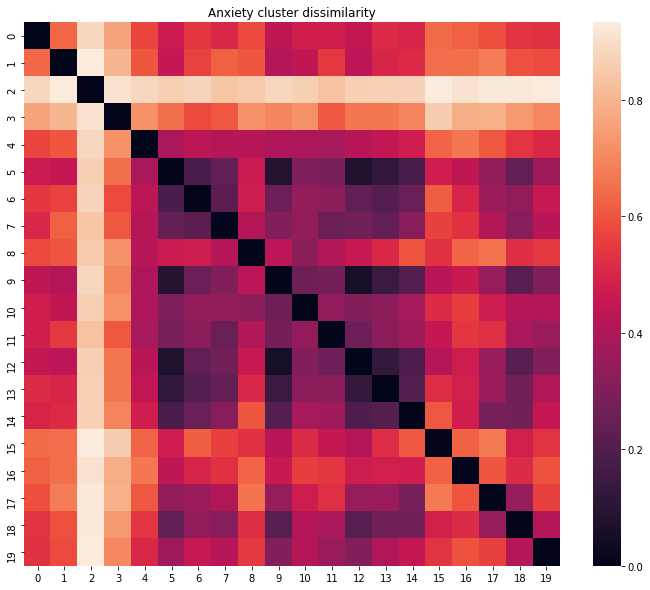

In [103]:
cluster_by_cluster_RDM = squareform(pdist(np.array(step2_RDMs),'correlation'))
plt.subplots(figsize=(12,10))
sns.heatmap(cluster_by_cluster_RDM)
plt.title('Anxiety cluster dissimilarity')

In [92]:
anxiety_rdm=pd.DataFrame(data=cluster_by_cluster_RDM,columns=np.arange(20),index=np.arange(20))
anxiety_rdm=anxiety_rdm[ctrl_cluster_ind]
anxiety_rdm=anxiety_rdm.reindex(ctrl_cluster_ind)

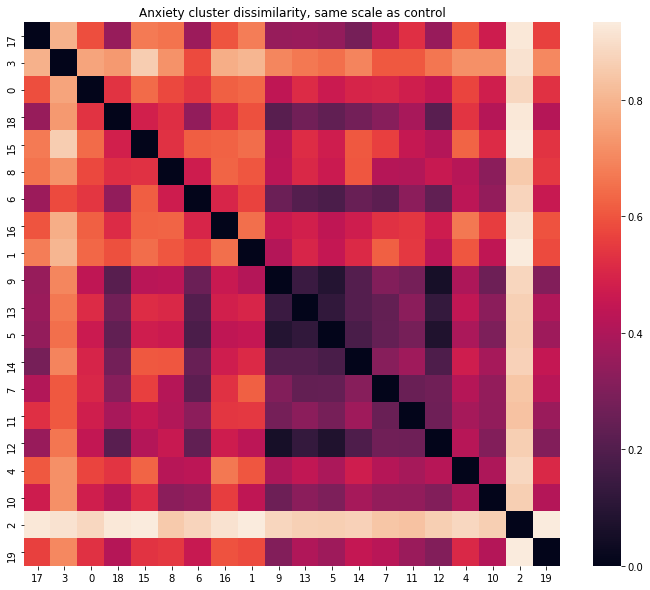

In [105]:
plt.subplots(figsize=(12,10))
plt.title('Anxiety cluster dissimilarity, same scale as control')
sns.heatmap(anxiety_rdm)

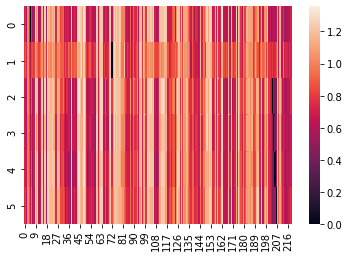

In [10]:
sns.heatmap(cluster_correlations)
## can do: how similar is (question 1 in cluster 1) compared to all 200 questions, 
# versus question 2 in cluster 1 compared to all 200 questions

# INSTEAD: how similar is question 1 (out of all questions) compared to each question within our target cluster of questions
# compared with question 2 (out of all questions ) compared to each question within our target cluster
# how correlated is question 1's vector (which has 6 values in it, one for each question in our cluster)
# with question 2's vecotr (whcich has 6 values in it) - so we are correlating 200 (6 item) vectors

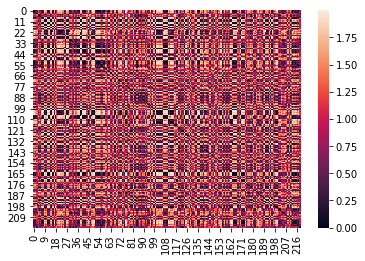

In [15]:
a = pdist(cluster_correlations.T, 'correlation')
sns.heatmap(squareform(a))

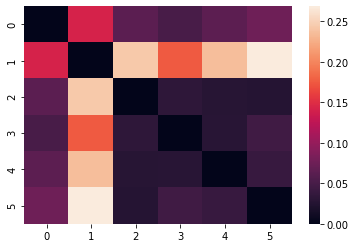

In [14]:
not_transposed = pdist(cluster_correlations,'correlation')
sns.heatmap(squareform(not_transposed))

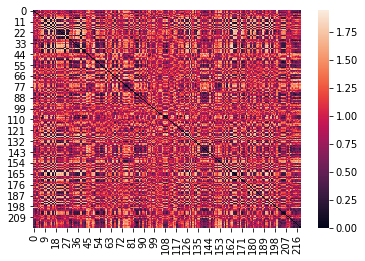

In [12]:
cluster1= within_cluster_RDMs[0]
sns.heatmap(squareform(cluster1))

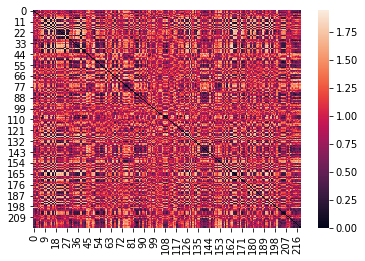

In [20]:
cluster2= within_cluster_RDMs[0]
sns.heatmap(squareform(cluster2))

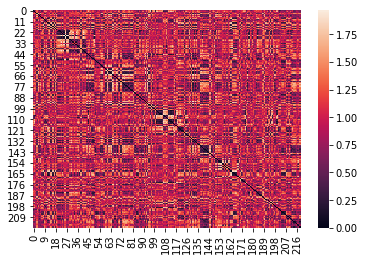

In [21]:
sns.heatmap(squareform(within_cluster_RDMs[1]))

In [17]:
within_cluster_RDMs = np.array(within_cluster_RDMs)
cluster_by_cluster_RDM = squareform(pdist(within_cluster_RDMs, 'correlation'))


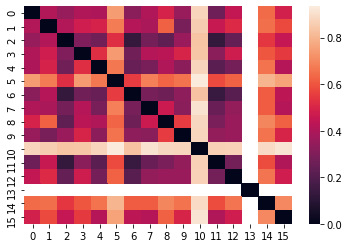

In [18]:
sns.heatmap(cluster_by_cluster_RDM)

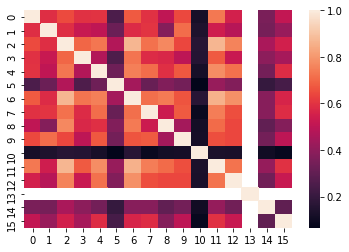

In [22]:
sns.heatmap(1 - cluster_by_cluster_RDM)

In [31]:
A = np.random.rand(120)
B = np.random.rand(120)
C = pdist(within_cluster_RDMs, 'correlation')


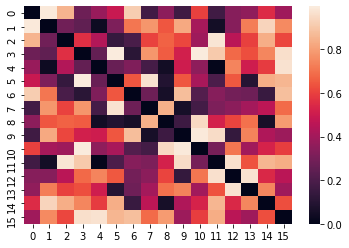

In [32]:
sns.heatmap(squareform(A))

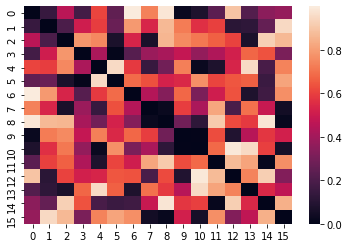

In [33]:
sns.heatmap(squareform(B))

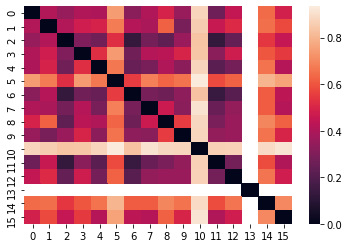

In [34]:
sns.heatmap(squareform(C))

In [35]:
data = np.array([A,B,C])

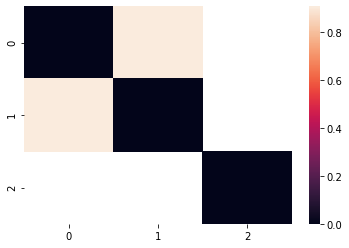

In [36]:
final = pdist(data,'correlation')
a = squareform(final)
sns.heatmap(a)

In [23]:
## run the analysis for each number of clusters. 
cluster_RDM_results = {} # this stores our results
for num in range(16,26):
    raw_df = raw_responses.T.set_index(zip(labels[num],questions))
    across_question_correlations = squareform(pdist(raw_df.values,'correlation'))
    # within-cluster RDMs
    # go through each cluster, pull out all questions in that cluster, and compute an RDM over their responses
    within_RDMs = []
    for c in range(num): 
        indices = (labels[num] == c) # just figure out where in the raw responses that question is
        # this gives us how correlated those questions are with all the questions in the survey
        cluster_correlations = across_question_correlations[indices]
        # transposing so that the questions are features and the correlation values are samples 
        within_RDMs.append(pdist(cluster_correlations.T, 'correlation')) # correlation distance
    
    # compute RDMs across clusters - correlation distance of each cluster from each other cluster
    within_cluster_RDMs = np.array(within_RDMs)
    cluster_by_cluster_RDM = squareform(pdist(within_cluster_RDMs, 'correlation'))
    cluster_RDM_results[num] = cluster_by_cluster_RDM


Text(0.5, 1, 'survey question 16 clusters RDM')

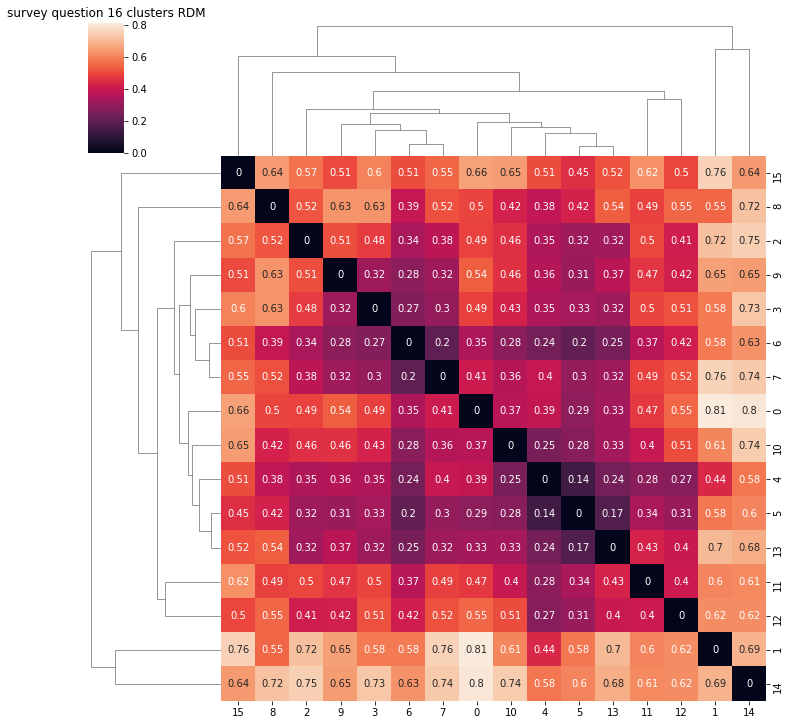

In [35]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[16],metric='correlation',annot=True)
plt.title('survey question 16 clusters RDM')

Text(0.5, 1, 'survey question 17 clusters RDM')

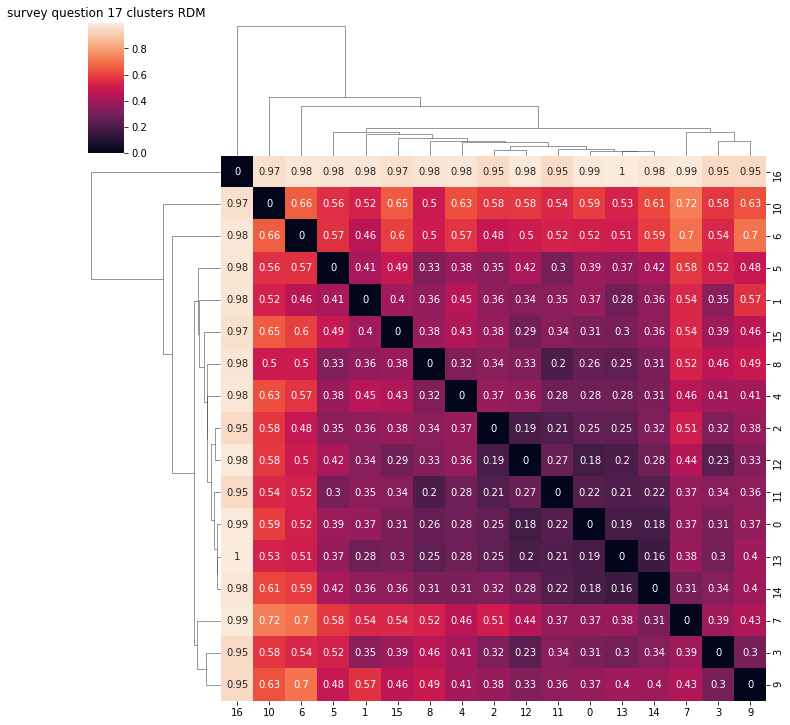

In [36]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[17],metric='correlation',annot=True)
plt.title('survey question 17 clusters RDM')

Text(0.5, 1, 'survey question 18 clusters RDM')

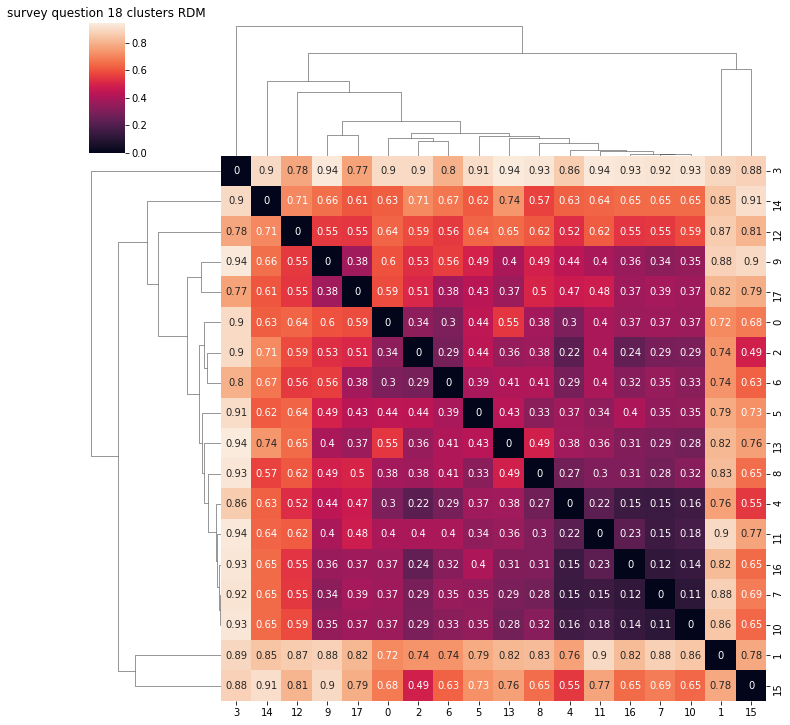

In [37]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[18],metric='correlation',annot=True)
plt.title('survey question 18 clusters RDM')

Text(0.5, 1, 'survey question 19 clusters RDM')

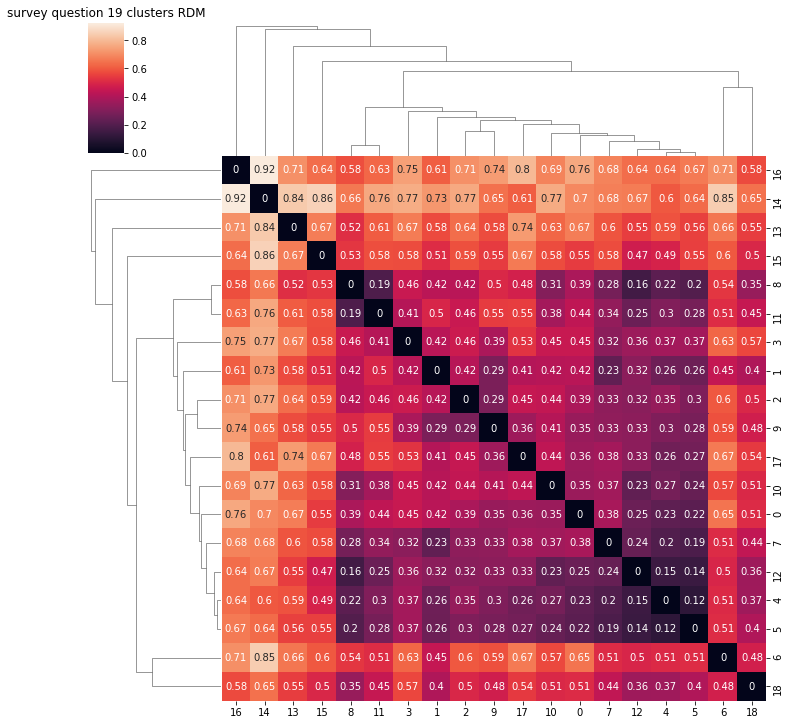

In [38]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[19],metric='correlation',annot=True)
plt.title('survey question 19 clusters RDM')

Text(0.5, 1, 'survey question 20 clusters RDM')

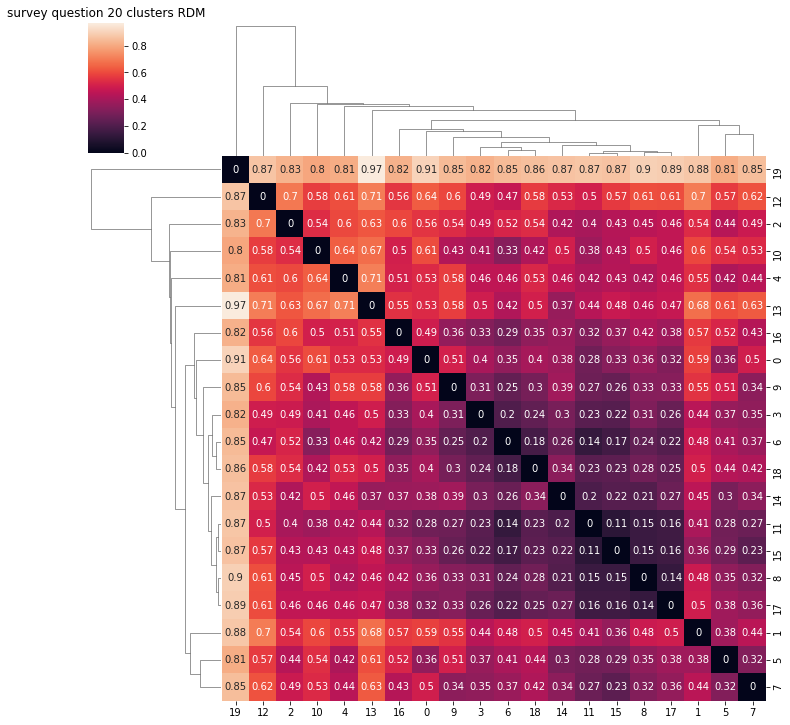

In [39]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[20],metric='correlation',annot=True)
plt.title('survey question 20 clusters RDM')

Text(0.5, 1, 'survey question 21 clusters RDM')

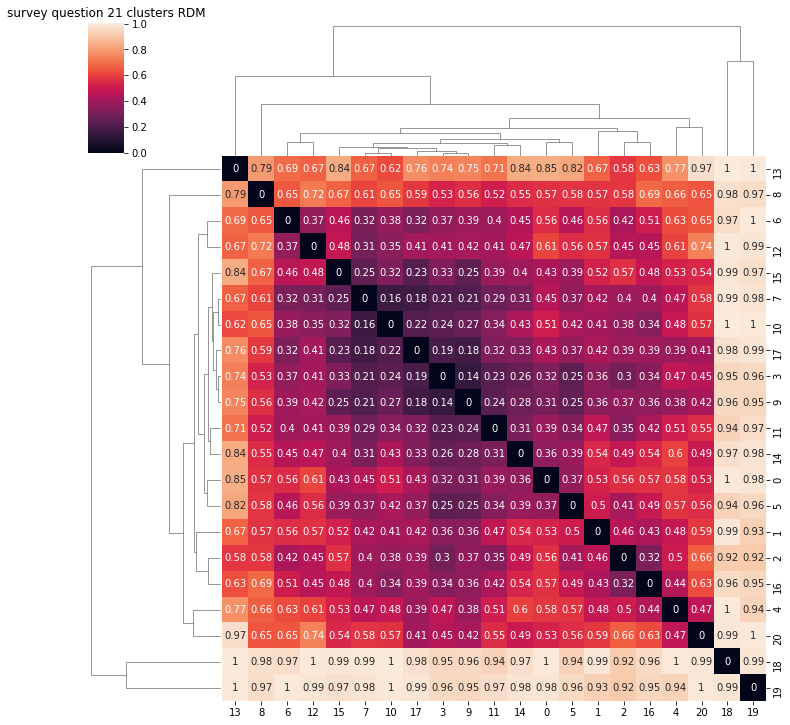

In [40]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[21],metric='correlation',annot=True)
plt.title('survey question 21 clusters RDM')

Text(0.5, 1, 'survey question 22 clusters RDM')

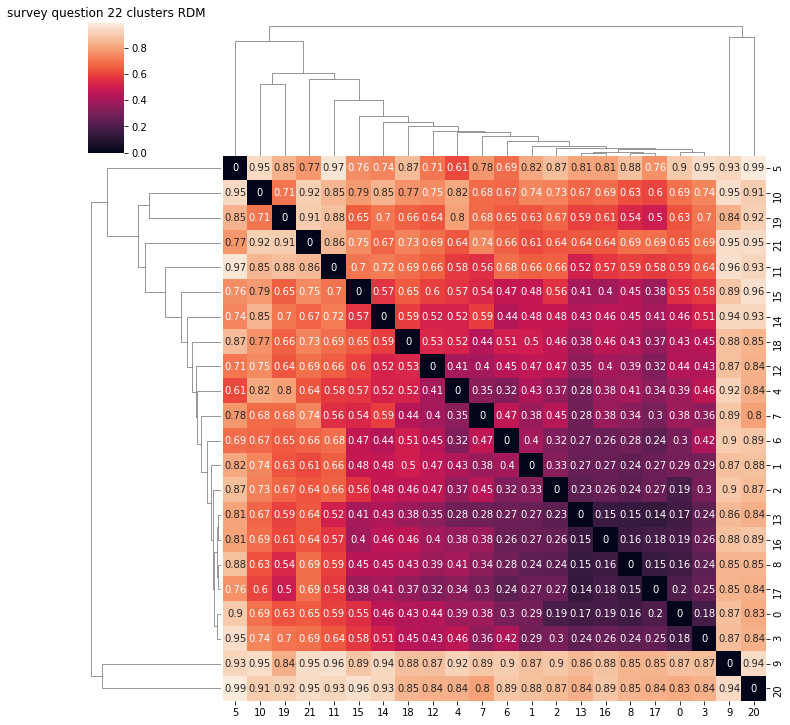

In [34]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[22],metric='correlation',annot=True)
plt.title('survey question 22 clusters RDM')

Text(0.5, 1, 'survey question 23 clusters RDM')

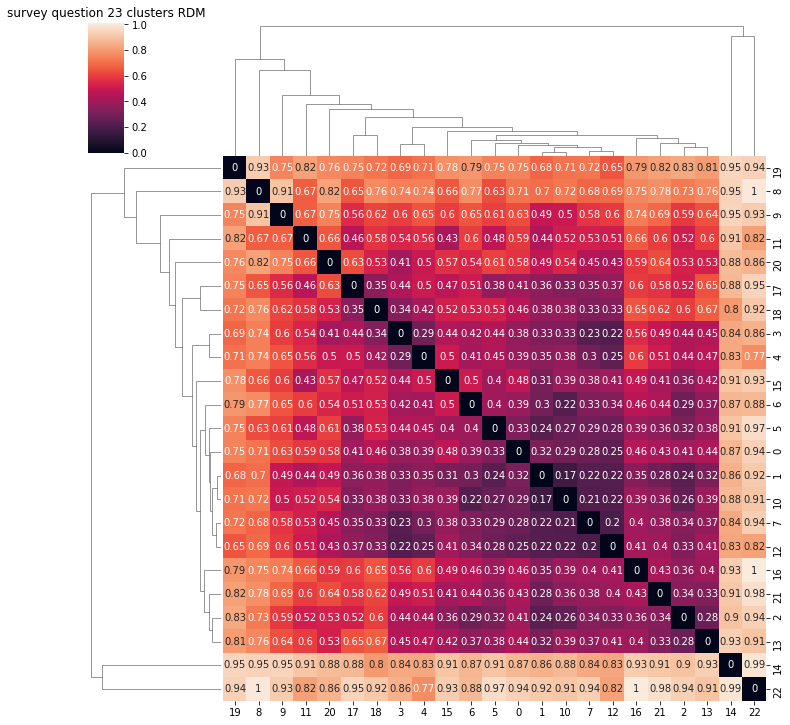

In [53]:
# Visualize cluster RDMs
sns.clustermap(cluster_RDM_results[23],metric='correlation', annot=True)
plt.title('survey question 23 clusters RDM')

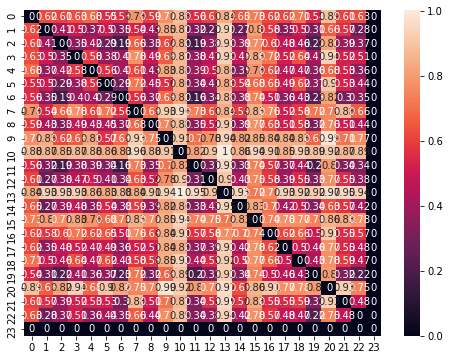

In [59]:
# # Visualize cluster RDMs
# sns.clustermap(np.nan_to_num(cluster_RDM_results[24]),metric='correlation',annot=True)
# plt.title('survey question 24 clusters RDM')
f, ax = plt.subplots(figsize=(8, 6))
b = np.nan_to_num(cluster_RDM_results[24])
sns.heatmap(b,annot=True)

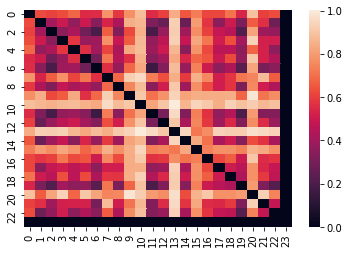

In [57]:
# Visualize cluster RDMs
plt.figsize(11,9)
sns.heatmap(np.nan_to_num(cluster_RDM_results[25]),annot=True)
plt.title('survey question 25 clusters RDM')

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

In [22]:
# transpose the data so that the questions are the features and the responses are samples
# so you wind up doing the DSM across question responses
# this shows us what question each value is (now columns are responses)
# and match clusters to questions
raw_df = raw_responses.T.set_index(cluster_labels_16)
across_question_correlations = squareform(pdist(raw_df.values,'correlation'))
sns.heatmap(across_question_correlations)
plt.title('survey question 16 clusters RDM')

NameError: name 'cluster_labels' is not defined

In [243]:
# figure out which question was in which cluster
cluster_number = pd.unique(cluster_labels)
cluster_labels = cluster_labels.to_list()

In [254]:
# within-cluster RDMs
# go through each cluster, pull out all questions in that cluster, and compute an RDM over their responses
within_RDMs = []
for c in cluster_number: 
    indices = (cluster_labels == c) # just figure out where in the raw responses that question is
    # this gives us how correlated those questions are with all the questions in the survey
    cluster_correlations = across_question_correlations[indices]
    # transposing so that the questions are features and the correlation values are samples 
    within_RDMs.append(pdist(cluster_correlations.T, 'correlation')) # correlation distance 

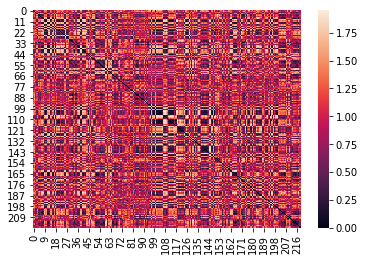

In [255]:
# if we visualize one of those, you get the representational dissimilarity matrix of all the questions 
# within that one cluster
x = within_RDMs[0]
y = within_RDMs[4]
sns.heatmap(squareform(x))

Text(0.5, 1, 'question cluster RDM')

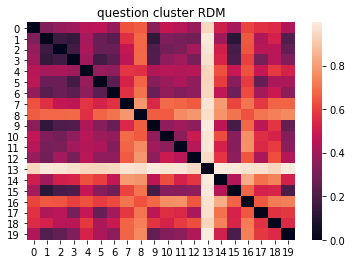

In [245]:
# compute RDMs across clusters - correlation distance of each cluster from each other cluster
within_cluster_RDMs = np.array(within_RDMs)
cluster_by_cluster_RDM = squareform(pdist(within_cluster_RDMs,'correlation'))
sns.heatmap(cluster_by_cluster_RDM)
plt.title('question cluster RDM')

In [7]:
# create 100 random matrices of 200 features, 100 samples; display one of them
random_matrices = [np.random.rand(100,200) for i in range(100)]

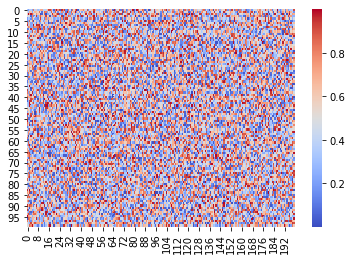

In [8]:
sns.heatmap(random_matrices[0],cmap='coolwarm')

In [28]:
# This will create a second-order RDM; comparing the similarity structure within a cluster to
# that of other clusters, given our random dataset.

In [29]:
# create arbitrary feature clusters ; 5 consecutive features per cluster, 40 clusters
clusters = np.array_split(np.arange(200), 40)
# loop through all clusters; create one RDM per cluster
rdms = []
for cluster in clusters:
    # get all the cluster data for each matrix in the cluster; vectorize
    # becomes (100, 1000) - one vectorized cluster per matrix
    cluster_data = np.array([mat[:,cluster].ravel() for mat in random_matrices])
    dsm = pdist(cluster_data, 'correlation') # dissimilarity between each cluster
    # if you want it in squareform, can do:
    #dsm_sq = squareform(dsm)
    # but as is, each DSM is the vectorized lower triangle of a correlation distance matrix
    rdms.append(dsm)

# this gives you a RDM for each cluster. (vectorized)
rdms = np.array(rdms)
cluster_rdm = squareform(pdist(rdms, 'correlation'))


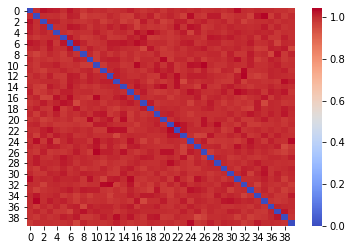

In [30]:
# since there's no structure to this data, the correlation distance between things is nearly always 1 - no correlation
# aside from along the diagonal
sns.heatmap(cluster_rdm, cmap='coolwarm')

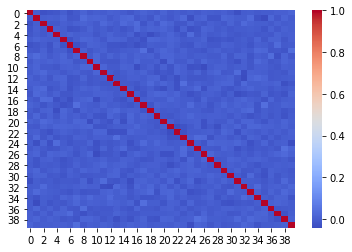

In [31]:
# can flip it to correlation
sns.heatmap(1-cluster_rdm, cmap='coolwarm')